In [1]:
import pandas as pd
import numpy as np
import glob as gb
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',30)

In [3]:
import_folder_path06x = 'C:\\Users\\yhres\\Dropbox (株式会社　Ｍａｎａｇｅ)\\NK人事\\000_給与計算\\999999-移行_時間管理★★\\200620\\単価計算'
import_folder_path06y = 'C:\\Users\\yhres\\Dropbox (株式会社　Ｍａｎａｇｅ)\\NK人事\\000_給与計算\\999999-移行_時間管理★★\\200620\\時間計算'
import_folder_path07x = 'C:\\Users\\yhres\\Dropbox (株式会社　Ｍａｎａｇｅ)\\NK人事\\000_給与計算\\999999-移行_時間管理★★\\200720\\単価計算'
import_folder_path07y = 'C:\\Users\\yhres\\Dropbox (株式会社　Ｍａｎａｇｅ)\\NK人事\\000_給与計算\\999999-移行_時間管理★★\\200720\\時間計算'
import_folder_path08x = 'C:\\Users\\yhres\\Dropbox (株式会社　Ｍａｎａｇｅ)\\NK人事\\000_給与計算\\999999-移行_時間管理★★\\200820\\単価計算'
import_folder_path08y = 'C:\\Users\\yhres\\Dropbox (株式会社　Ｍａｎａｇｅ)\\NK人事\\000_給与計算\\999999-移行_時間管理★★\\200820\\時間計算'
import_folder_path09x = 'C:\\Users\\yhres\\Dropbox (株式会社　Ｍａｎａｇｅ)\\NK人事\\000_給与計算\\999999-移行_時間管理★★\\200920\\単価計算'
import_folder_path09y = 'C:\\Users\\yhres\\Dropbox (株式会社　Ｍａｎａｇｅ)\\NK人事\\000_給与計算\\999999-移行_時間管理★★\\200920\\時間計算'
import_folder_path10x = 'C:\\Users\\yhres\\Dropbox (株式会社　Ｍａｎａｇｅ)\\NK人事\\000_給与計算\\999999-移行_時間管理★★\\201020\\単価計算'
import_folder_path10y = 'C:\\Users\\yhres\\Dropbox (株式会社　Ｍａｎａｇｅ)\\NK人事\\000_給与計算\\999999-移行_時間管理★★\\201020\\時間計算'
import_folder_path11x = 'C:\\Users\\yhres\\Dropbox (株式会社　Ｍａｎａｇｅ)\\NK人事\\000_給与計算\\999999-移行_時間管理★★\\201120\\単価計算'
import_folder_path11y = 'C:\\Users\\yhres\\Dropbox (株式会社　Ｍａｎａｇｅ)\\NK人事\\000_給与計算\\999999-移行_時間管理★★\\201120\\時間計算'

In [4]:
path_data06x = import_folder_path06x+'/'+'*.csv'
path_data06y = import_folder_path06y+'/'+'*.csv'
path_data07x = import_folder_path07x+'/'+'*.csv'
path_data07y = import_folder_path07y+'/'+'*.csv'
path_data08x = import_folder_path08x+'/'+'*.csv'
path_data08y = import_folder_path08y+'/'+'*.csv'
path_data09x = import_folder_path09x+'/'+'*.csv'
path_data09y = import_folder_path09y+'/'+'*.csv'
path_data10x = import_folder_path10x+'/'+'*.csv'
path_data10y = import_folder_path10y+'/'+'*.csv'
path_data11x = import_folder_path11x+'/'+'*.csv'
path_data11y = import_folder_path11y+'/'+'*.csv'

In [5]:
file_path06x = gb.glob(path_data06x)
file_path06y = gb.glob(path_data06y)
file_path07x = gb.glob(path_data07x)
file_path07y = gb.glob(path_data07y)
file_path08x = gb.glob(path_data08x)
file_path08y = gb.glob(path_data08y)
file_path09x = gb.glob(path_data09x)
file_path09y = gb.glob(path_data09y)
file_path10x = gb.glob(path_data10x)
file_path10y = gb.glob(path_data10y)
file_path11x = gb.glob(path_data11x)
file_path11y = gb.glob(path_data11y)

#6月分

In [6]:
#単価Ver読込とデータ変形
df = pd.DataFrame()

for i in file_path06x:
    df06 = pd.read_csv(i, encoding = 'cp932', skiprows = 1, index_col = '社員CD' )
    df = pd.concat([df06,df])

In [7]:
#役員除外＆スライスで抽出
df06x = df[['所属名', '氏名', '営業時間外', '通常勤務外', '普通残業.1', '深夜残業.1', '休日出勤.1']]
df06x_cut = df06x.drop([330014,300001,270001,320002], axis='index')

In [8]:
#TOTALカラムの追加
df06x_cut.loc[:, 'Row_Total'] = df06x_cut.sum(axis=1)

In [9]:
#時間Ver読込＆データ変形
df = pd.DataFrame()

for i in file_path06y:
    df06y = pd.read_csv(i, encoding = 'cp932', skiprows = 1, index_col = '社員CD' )
    df = pd.concat([df06y, df])

In [10]:
#役員除外＆スライスで抽出
df06y = df[['所属名', '氏名', '通常時間外.1', '普通残業.1', '深夜所定外.1', '深夜残業.1', '休日所/外/残', '休日深夜.1']]
df06y_cut = df06y.drop([330014,300001,270001,320002], axis='index')
df06y_cut

,所属名,氏名,通常時間外.1,普通残業.1,深夜所定外.1,深夜残業.1,休日所/外/残,休日深夜.1
社員CD,,,,,,,,
370056,八戸,三浦 学,890.0,NaN,0,0,3013.0,0
400200,八戸,佐藤 あかり,2835.0,NaN,0,2130,21760.0,0
400400,八戸,種市 颯,580.0,NaN,0,0,0.0,0
400448,八戸,川村 文子,4313.0,NaN,0,0,3875.0,0
400605,八戸,渋谷 絵真理,0.0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...
400615,苫小牧,影山 佑智佳,NaN,0.0,0,0,0.0,0
330010,函館,川橋 陽子,NaN,NaN,1508,605,2170.0,0
400074,函館,古谷 まどか,NaN,NaN,1690,0,0.0,0


In [11]:
#TOTALカラムの追加
df06y_cut.loc[:, 'Row_Total2'] = df06y_cut.sum(axis=1)

In [12]:
#各データをマージ＆不要カラムを削除＆リネーム
df06xy_merge = pd.merge(df06x_cut, df06y_cut, left_index = True, right_index = True, how = 'inner')
df06xy = df06xy_merge.drop(['営業時間外', '通常勤務外', '普通残業.1_x', '深夜残業.1_x', '休日出勤.1', '所属名_y', '氏名_y', '通常時間外.1', '普通残業.1_y', '深夜所定外.1', '深夜残業.1_y', 
                   '休日所/外/残', '休日深夜.1'], axis=1)
df06_OK = df06xy.rename(columns={ '所属名_x':'所属', '氏名_x':'氏名', 'Row_Total':'6_1件単価制', 'Row_Total2':'6_時間計算'})

In [13]:
#差額カラム追加してFin
df06_OK.loc[:, '6月差額'] = df06_OK['6_時間計算'] - df06_OK['6_1件単価制']

In [14]:
#インデックスをリセットし、再設定
df06_OK.reset_index(inplace=True)
df06_OK.set_index(['社員CD'],inplace=True)
df06_OK

,所属,氏名,6_1件単価制,6_時間計算,6月差額
社員CD,,,,,
370056,八戸,三浦 学,11500.0,3903.0,-7597.0
400200,八戸,佐藤 あかり,28500.0,26725.0,-1775.0
400400,八戸,種市 颯,12000.0,580.0,-11420.0
400448,八戸,川村 文子,29000.0,8188.0,-20812.0
400605,八戸,渋谷 絵真理,0.0,0.0,0.0
...,...,...,...,...,...
400615,苫小牧,影山 佑智佳,0.0,0.0,0.0
330010,函館,川橋 陽子,31500.0,4283.0,-27217.0
400074,函館,古谷 まどか,24500.0,1690.0,-22810.0


#7月分

In [15]:
#単価Ver読込とデータ変形
df = pd.DataFrame()

for i in file_path07x:
    df07 = pd.read_csv(i, encoding = 'cp932', skiprows = 1, index_col = '社員CD' )
    df = pd.concat([df07,df])

In [16]:
#役員除外＆スライスで抽出
df07x = df[['所属名', '氏名', '営業時間外', '通常勤務外', '普通残業.1', '深夜残業.1', '休日出勤.1']]
df07x_cut = df07x.drop([330014,300001,270001,320002], axis='index')

In [17]:
#TOTALカラムの追加
df07x_cut.loc[:, 'Row_Total'] = df07x_cut.sum(axis=1)

In [18]:
#時間Ver読込＆データ変形
df = pd.DataFrame()

for i in file_path07y:
    df07y = pd.read_csv(i, encoding = 'cp932', skiprows = 1, index_col = '社員CD' )
    df = pd.concat([df07y, df])

In [19]:
#役員除外＆スライスで抽出
df07y = df[['所属名', '氏名', '通常時間外.1', '普通残業.1', '深夜所定外.1', '深夜残業.1', '休日所/外/残', '休日深夜.1']]
df07y_cut = df07y.drop([330014,300001,270001,320002], axis='index')

In [20]:
#TOTALカラムの追加
df07y_cut.loc[:, 'Row_Total2'] = df07y_cut.sum(axis=1)

In [21]:
#各データをマージ＆不要カラムを削除＆リネーム
df07xy_merge = pd.merge(df07x_cut, df07y_cut, left_index = True, right_index = True, how = 'inner')
df07xy = df07xy_merge.drop(['営業時間外', '通常勤務外', '普通残業.1_x', '深夜残業.1_x', '休日出勤.1', '所属名_y', '氏名_y', '通常時間外.1', '普通残業.1_y', '深夜所定外.1', '深夜残業.1_y', 
                   '休日所/外/残', '休日深夜.1'], axis=1)
df07_OK = df07xy.rename(columns={ '所属名_x':'所属', '氏名_x':'氏名', 'Row_Total':'7_1件単価制', 'Row_Total2':'7_時間計算'})

In [22]:
#差額カラム追加してFin
df07_OK.loc[:, '7月差額'] = df07_OK['7_時間計算'] - df07_OK['7_1件単価制']

In [23]:
#インデックスをリセットし、再設定
df07_OK.reset_index(inplace=True)
df07_OK.set_index(['社員CD'],inplace=True)

#8月分

In [24]:
#単価Ver読込とデータ変形
df = pd.DataFrame()

for i in file_path08x:
    df08 = pd.read_csv(i, encoding = 'cp932', skiprows = 1, index_col = '社員CD' )
    df = pd.concat([df08,df])

In [25]:
#役員除外＆スライスで抽出
df08x = df[['所属名', '氏名', '営業時間外', '通常勤務外', '普通残業.1', '深夜残業.1', '休日出勤.1']]
df08x_cut = df08x.drop([330014,300001,270001,320002], axis='index')

In [26]:
#TOTALカラムの追加
df08x_cut.loc[:, 'Row_Total'] = df08x_cut.sum(axis=1)

In [27]:
#時間Ver読込＆データ変形
df = pd.DataFrame()

for i in file_path08y:
    df08y = pd.read_csv(i, encoding = 'cp932', skiprows = 1, index_col = '社員CD' )
    df = pd.concat([df08y, df])

In [28]:
#役員除外＆スライスで抽出
df08y = df[['所属名', '氏名', '通常時間外.1', '普通残業.1', '深夜所定外.1', '深夜残業.1', '休日所/外/残', '休日深夜.1']]
df08y_cut = df08y.drop([330014,300001,270001,320002], axis='index')

In [29]:
#TOTALカラムの追加
df08y_cut.loc[:, 'Row_Total2'] = df08y_cut.sum(axis=1)

In [30]:
#各データをマージ＆不要カラムを削除＆リネーム
df08xy_merge = pd.merge(df08x_cut, df08y_cut, left_index = True, right_index = True, how = 'inner')
df08xy = df08xy_merge.drop(['営業時間外', '通常勤務外', '普通残業.1_x', '深夜残業.1_x', '休日出勤.1', '所属名_y', '氏名_y', '通常時間外.1', '普通残業.1_y', '深夜所定外.1', '深夜残業.1_y', 
                   '休日所/外/残', '休日深夜.1'], axis=1)
df08_OK = df08xy.rename(columns={ '所属名_x':'所属', '氏名_x':'氏名', 'Row_Total':'8_1件単価制', 'Row_Total2':'8_時間計算'})

In [31]:
#差額カラム追加してFin
df08_OK.loc[:, '8月差額'] = df08_OK['8_時間計算'] - df08_OK['8_1件単価制']

In [32]:
#インデックスをリセットし、再設定
df08_OK.reset_index(inplace=True)
df08_OK.set_index(['社員CD'],inplace=True)

#9月分

In [33]:
#単価Ver読込とデータ変形
df = pd.DataFrame()

for i in file_path09x:
    df09 = pd.read_csv(i, encoding = 'cp932', skiprows = 1, index_col = '社員CD' )
    df = pd.concat([df09,df])

In [34]:
#役員除外＆スライスで抽出
df09x = df[['所属名', '氏名', '営業時間外', '通常勤務外', '普通残業.1', '深夜残業.1', '休日出勤.1']]
df09x_cut = df09x.drop([330014,300001,270001,320002], axis='index')

In [35]:
#TOTALカラムの追加
df09x_cut.loc[:, 'Row_Total'] = df09x_cut.sum(axis=1)

In [36]:
#時間Ver読込＆データ変形
df = pd.DataFrame()

for i in file_path09y:
    df09y = pd.read_csv(i, encoding = 'cp932', skiprows = 1, index_col = '社員CD' )
    df = pd.concat([df09y, df])

In [37]:
#役員除外＆スライスで抽出
df09y = df[['所属名', '氏名', '通常時間外.1', '普通残業.1', '深夜所定外.1', '深夜残業.1', '休日所/外/残', '休日深夜.1']]
df09y_cut = df09y.drop([330014,300001,270001,320002], axis='index')

In [38]:
#TOTALカラムの追加
df09y_cut.loc[:, 'Row_Total2'] = df09y_cut.sum(axis=1)

In [39]:
#各データをマージ＆不要カラムを削除＆リネーム
df09xy_merge = pd.merge(df09x_cut, df09y_cut, left_index = True, right_index = True, how = 'inner')
df09xy = df09xy_merge.drop(['営業時間外', '通常勤務外', '普通残業.1_x', '深夜残業.1_x', '休日出勤.1', '所属名_y', '氏名_y', '通常時間外.1', '普通残業.1_y', '深夜所定外.1', '深夜残業.1_y', 
                   '休日所/外/残', '休日深夜.1'], axis=1)
df09_OK = df09xy.rename(columns={ '所属名_x':'所属', '氏名_x':'氏名', 'Row_Total':'9_1件単価制', 'Row_Total2':'9_時間計算'})

In [40]:
#差額カラム追加してFin
df09_OK.loc[:, '9月差額'] = df09_OK['9_時間計算'] - df09_OK['9_1件単価制']

In [41]:
#インデックスをリセットし、再設定
df09_OK.reset_index(inplace=True)
df09_OK.set_index(['社員CD'],inplace=True)

#10月分

In [42]:
#単価Ver読込とデータ変形
df = pd.DataFrame()

for i in file_path10x:
    df10 = pd.read_csv(i, encoding = 'cp932', skiprows = 1, index_col = '社員CD' )
    df = pd.concat([df10,df])

In [43]:
#役員除外＆スライスで抽出
df10x = df[['所属名', '氏名', '営業時間外', '通常勤務外', '普通残業.1', '深夜残業.1', '休日出勤.1']]
df10x_cut = df10x.drop([330014,300001,270001,320002], axis='index')

In [44]:
#TOTALカラムの追加
df10x_cut.loc[:, 'Row_Total'] = df10x_cut.sum(axis=1)

In [45]:
#時間Ver読込＆データ変形
df = pd.DataFrame()

for i in file_path10y:
    df10y = pd.read_csv(i, encoding = 'cp932', skiprows = 1, index_col = '社員CD' )
    df = pd.concat([df10y, df])

In [46]:
#役員除外＆スライスで抽出
df10y = df[['所属名', '氏名', '通常時間外.1', '普通残業.1', '深夜所定外.1', '深夜残業.1', '休日所/外/残', '休日深夜.1']]
df10y_cut = df10y.drop([330014,300001,270001,320002], axis='index')

In [47]:
#TOTALカラムの追加
df10y_cut.loc[:, 'Row_Total2'] = df10y_cut.sum(axis=1)

In [48]:
#各データをマージ＆不要カラムを削除＆リネーム
df10xy_merge = pd.merge(df10x_cut, df10y_cut, left_index = True, right_index = True, how = 'inner')
df10xy = df10xy_merge.drop(['営業時間外', '通常勤務外', '普通残業.1_x', '深夜残業.1_x', '休日出勤.1', '所属名_y', '氏名_y', '通常時間外.1', '普通残業.1_y', '深夜所定外.1', '深夜残業.1_y', 
                   '休日所/外/残', '休日深夜.1'], axis=1)
df10_OK = df10xy.rename(columns={ '所属名_x':'所属', '氏名_x':'氏名', 'Row_Total':'10_1件単価制', 'Row_Total2':'10_時間計算'})

In [49]:
#差額カラム追加してFin
df10_OK.loc[:, '10月差額'] = df10_OK['10_時間計算'] - df10_OK['10_1件単価制']

In [50]:
#インデックスをリセットし、再設定
df10_OK.reset_index(inplace=True)
df10_OK.set_index(['社員CD'],inplace=True)

#11月分

In [51]:
#単価Ver読込とデータ変形
df = pd.DataFrame()

for i in file_path11x:
    df11 = pd.read_csv(i, encoding = 'cp932', skiprows = 1, index_col = '社員CD' )
    df = pd.concat([df11,df])

In [52]:
#役員除外＆スライスで抽出
df11x = df[['所属名', '氏名', '営業時間外', '通常勤務外', '普通残業.1', '深夜残業.1', '休日出勤.1']]
df11x_cut = df11x.drop([330014,300001,270001,320002], axis='index')

In [53]:
#TOTALカラムの追加
df11x_cut.loc[:, 'Row_Total'] = df11x_cut.sum(axis=1)

In [54]:
#時間Ver読込＆データ変形
df = pd.DataFrame()

for i in file_path11y:
    df11y = pd.read_csv(i, encoding = 'cp932', skiprows = 1, index_col = '社員CD' )
    df = pd.concat([df11y, df])

In [55]:
#役員除外＆スライスで抽出
df11y = df[['所属名', '氏名', '通常時間外.1', '普通残業.1', '深夜所定外.1', '深夜残業.1', '休日所/外/残', '休日深夜.1']]
df11y_cut = df11y.drop([330014,300001,270001,320002], axis='index')

In [56]:
#TOTALカラムの追加
df11y_cut.loc[:, 'Row_Total2'] = df11y_cut.sum(axis=1)

In [57]:
#各データをマージ＆不要カラムを削除＆リネーム
df11xy_merge = pd.merge(df11x_cut, df11y_cut, left_index = True, right_index = True, how = 'inner')
df11xy = df11xy_merge.drop(['営業時間外', '通常勤務外', '普通残業.1_x', '深夜残業.1_x', '休日出勤.1', '所属名_y', '氏名_y', '通常時間外.1', '普通残業.1_y', '深夜所定外.1', '深夜残業.1_y', 
                   '休日所/外/残', '休日深夜.1'], axis=1)
df11_OK = df11xy.rename(columns={ '所属名_x':'所属', '氏名_x':'氏名', 'Row_Total':'11_1件単価制', 'Row_Total2':'11_時間計算'})

In [58]:
#差額カラム追加してFin
df11_OK.loc[:, '11月差額'] = df11_OK['11_時間計算'] - df11_OK['11_1件単価制']

In [59]:
#インデックスをリセットし、再設定
df11_OK.reset_index(inplace=True)
df11_OK.set_index(['社員CD'],inplace=True)

In [60]:
#マージ　/　一月でも在籍していれば該当社員情報を残すためouterで処理
df_m1 = pd.merge(df06_OK, df07_OK, left_index = True, right_index = True, how = 'outer')
df_m2 = pd.merge(df08_OK, df09_OK, left_index = True, right_index = True, how = 'outer')
df_m3 = pd.merge(df10_OK, df11_OK, left_index = True, right_index = True, how = 'outer')

df_m4 = pd.merge(df_m1, df_m2, left_index = True, right_index = True, how = 'outer')
df_m5 = pd.merge(df_m4, df_m3, left_index = True, right_index = True, how = 'outer')

pd.options.display.float_format = '{:.0f}'.format #小数点以下省略

In [61]:
#df_m5[df_m5['氏名_x_x'].isnull()] #nanの列の行を抽出
#df_m5.info()#列の情報を確認できる

In [92]:
#ソートバリュ_所属は任意の順でリスト→カテゴライズ　＆　差額は昇順ソートで視認性改善
place = ['札幌', '旭川', '苫小牧', '函館', '青森', '八戸', '盛岡', '釜石', '仙台', '石巻', '古川', '秋田', '大館', '能代',
             '山形', '福島', '神戸', '大阪', '名古屋', '倉敷', '茨城', '栃木', '埼玉', '狭山', '千葉', '流山', '東京北', '東京南', '戸田', '東京西', '横浜' ,'富士']

df06_OK.所属 = pd.Categorical(df06_OK.所属, categories = place)
df06_OK.sort_values(by=['所属'], inplace=True)#inplace渡すとソート結果がDF保持される
df07_OK.所属 = pd.Categorical(df07_OK.所属, categories = place)
df07_OK.sort_values(by=['所属'], inplace=True)
df08_OK.所属 = pd.Categorical(df08_OK.所属, categories = place)
df08_OK.sort_values(by=['所属'], inplace=True)
df09_OK.所属 = pd.Categorical(df09_OK.所属, categories = place)
df09_OK.sort_values(by=['所属'], inplace=True)
df10_OK.所属 = pd.Categorical(df10_OK.所属, categories = place)
df10_OK.sort_values(by=['所属'], inplace=True)
df11_OK.所属 = pd.Categorical(df11_OK.所属, categories = place)
df11_OK.sort_values(by=['所属'], inplace=True)
df06_OK

,所属,氏名,6_1件単価制,6_時間計算,6月差額
社員CD,,,,,
400486,札幌,上野 祐嗣,69500,15313,-54187
390034,札幌,澤田 篤,119500,15601,-103899
400537,札幌,天野 貴妃子,39500,3608,-35892
400506,札幌,杉村 智博,38000,4913,-33087
400519,札幌,佐々木 歩,37973,32058,-5915
310003,札幌,加藤 和栄,68101,64055,-4046
400440,札幌,山﨑 亜沙美,0,0,0
400015,札幌,松原 直美,0,0,0
400548,札幌,両角 裕介,69500,17380,-52120


In [63]:
pd.set_option('display.max_rows',None)#ここでdisplaymaxでdfチェック

In [91]:
#スライスして、所属毎のSUM
df06mt = df06_OK[['所属','6_1件単価制', '6_時間計算']]. groupby('所属').sum()
df07mt = df07_OK[['所属','7_1件単価制', '7_時間計算']]. groupby('所属').sum()
df08mt = df08_OK[['所属','8_1件単価制', '8_時間計算']]. groupby('所属').sum()
df09mt = df09_OK[['所属','9_1件単価制', '9_時間計算']]. groupby('所属').sum()
df10mt = df10_OK[['所属','10_1件単価制', '10_時間計算']]. groupby('所属').sum()
df11mt = df11_OK[['所属','11_1件単価制', '11_時間計算']]. groupby('所属').sum()
df06mt

,6_1件単価制,6_時間計算
所属,,
札幌,1020574,211462
旭川,149805,13905
苫小牧,55500,19623
函館,80500,7483
青森,124500,52550
八戸,81000,39396
盛岡,33500,4518
釜石,0,4590
仙台,1101091,203782


In [65]:
#matplotlibでグラフ化

In [66]:
#　x,yラベルにカラム代入
volume06 = df06mt['6_1件単価制']
volume06_2 = df06mt['6_時間計算']
labels06 = df06mt.index

volume07 = df07mt['7_1件単価制']
volume07_2 = df07mt['7_時間計算']
labels07 = df07mt.index

volume08 = df08mt['8_1件単価制']
volume08_2 = df08mt['8_時間計算']
labels08 = df08mt.index

volume09 = df09mt['9_1件単価制']
volume09_2 = df09mt['9_時間計算']
labels09 = df09mt.index

volume10 = df10mt['10_1件単価制']
volume10_2 = df10mt['10_時間計算']
labels10 = df10mt.index

volume11 = df11mt['11_1件単価制']
volume11_2 = df11mt['11_時間計算']
labels11 = df11mt.index

In [67]:
#6月

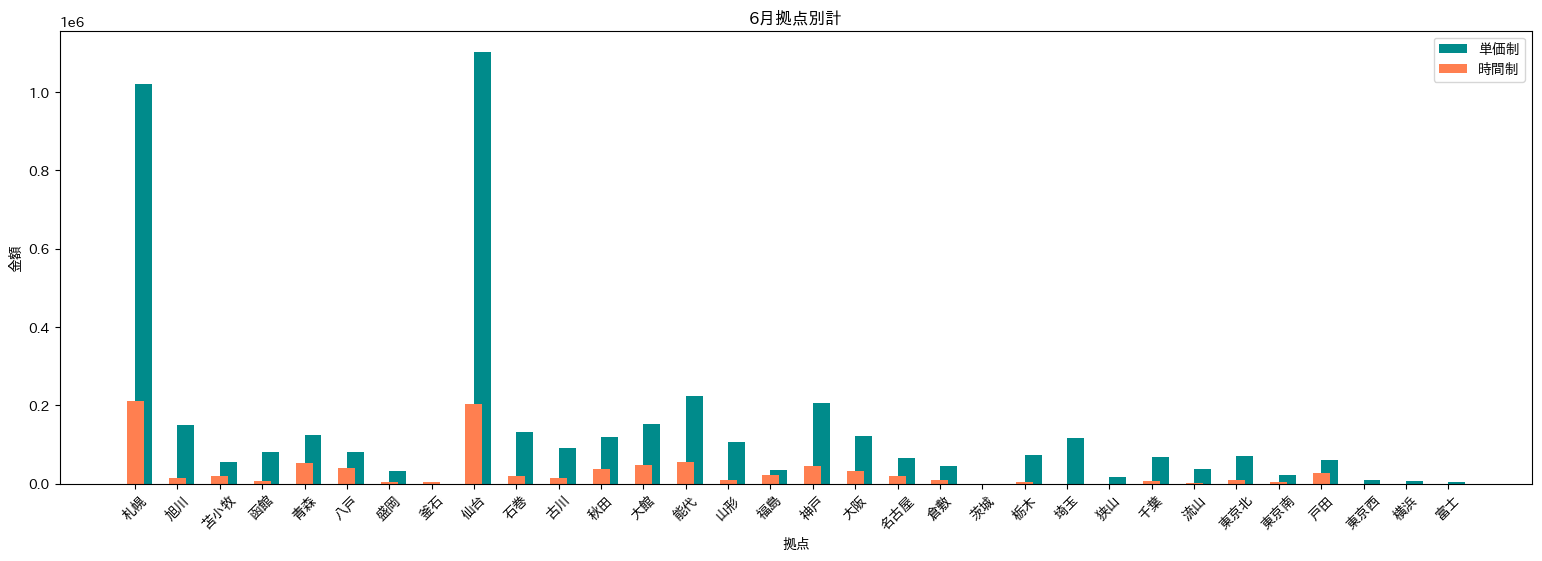

In [68]:
plt.figure(figsize=(19,6), dpi=100)
plt.bar(labels06, volume06, width=0.4, align='edge', color='darkcyan', label='単価制')
plt.bar(labels06, volume06_2, width=0.4, align='center', color='coral', label='時間制')#積み上げにする場合bottom=volume06追加
plt.legend()
plt.title('6月拠点別計')
plt.xlabel('拠点')
plt.ylabel('金額')
plt.xticks(rotation=45)#向き
plt.show()

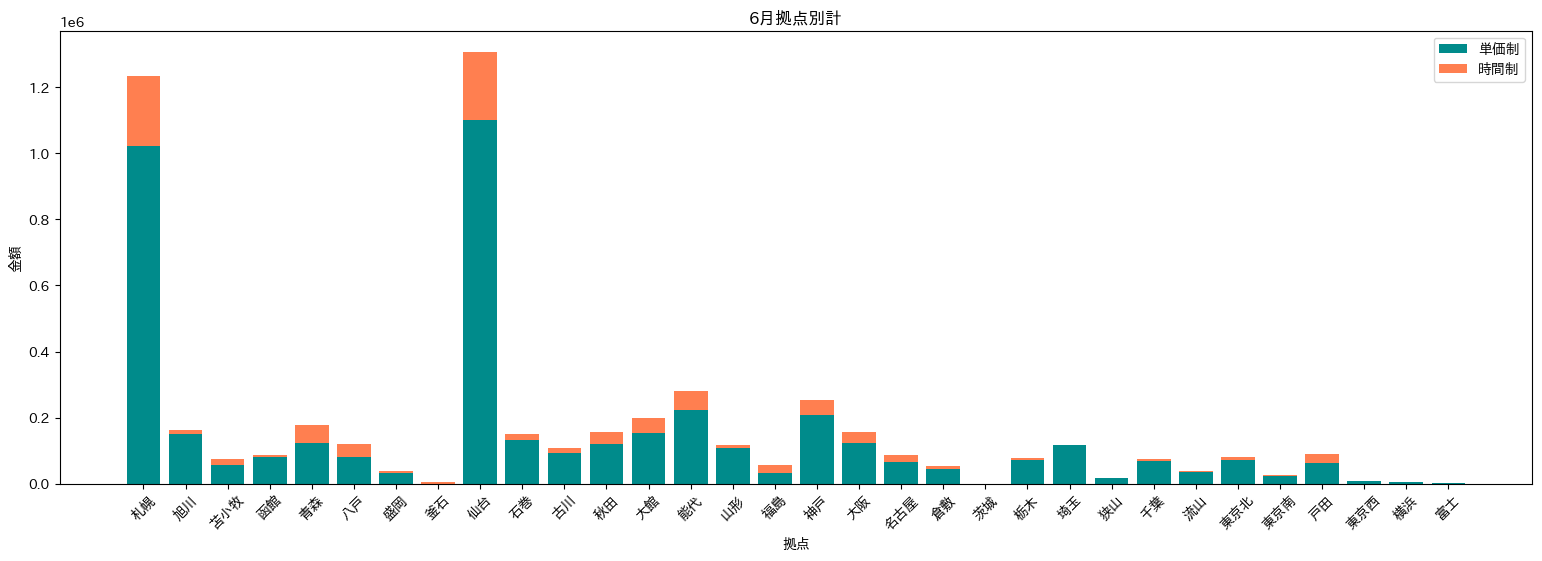

In [69]:
plt.figure(figsize=(19,6), dpi=100)
plt.bar(labels06, volume06, width=0.8, color='darkcyan', label='単価制')
plt.bar(labels06, volume06_2, width=0.8, color='coral', label='時間制', bottom=volume06)
plt.legend()
plt.title('6月拠点別計')
plt.xlabel('拠点')
plt.ylabel('金額')
plt.xticks(rotation=45)
plt.show()

In [70]:
#7月

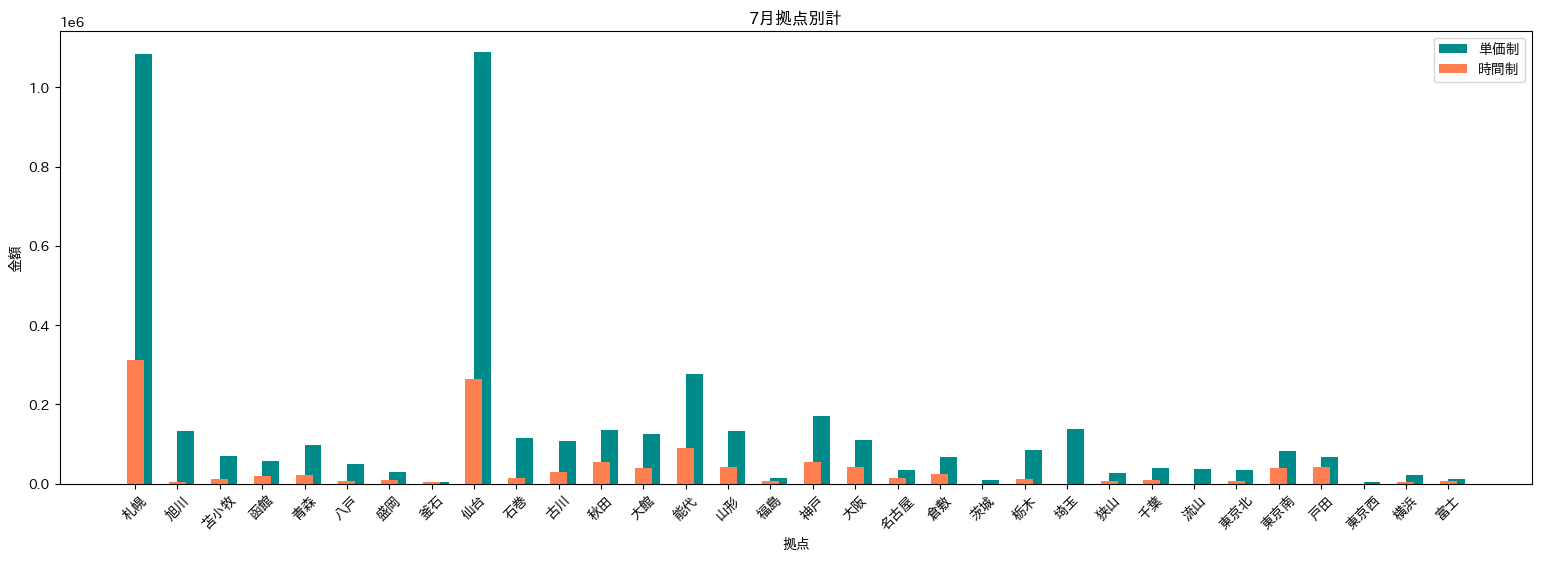

In [71]:
plt.figure(figsize=(19,6), dpi=100)
plt.bar(labels07, volume07, width=0.4, align='edge', color='darkcyan', label='単価制')
plt.bar(labels07, volume07_2, width=0.4, align='center', color='coral', label='時間制')
plt.legend()
plt.title('7月拠点別計')
plt.xlabel('拠点')
plt.ylabel('金額')
plt.xticks(rotation=45)
plt.show()

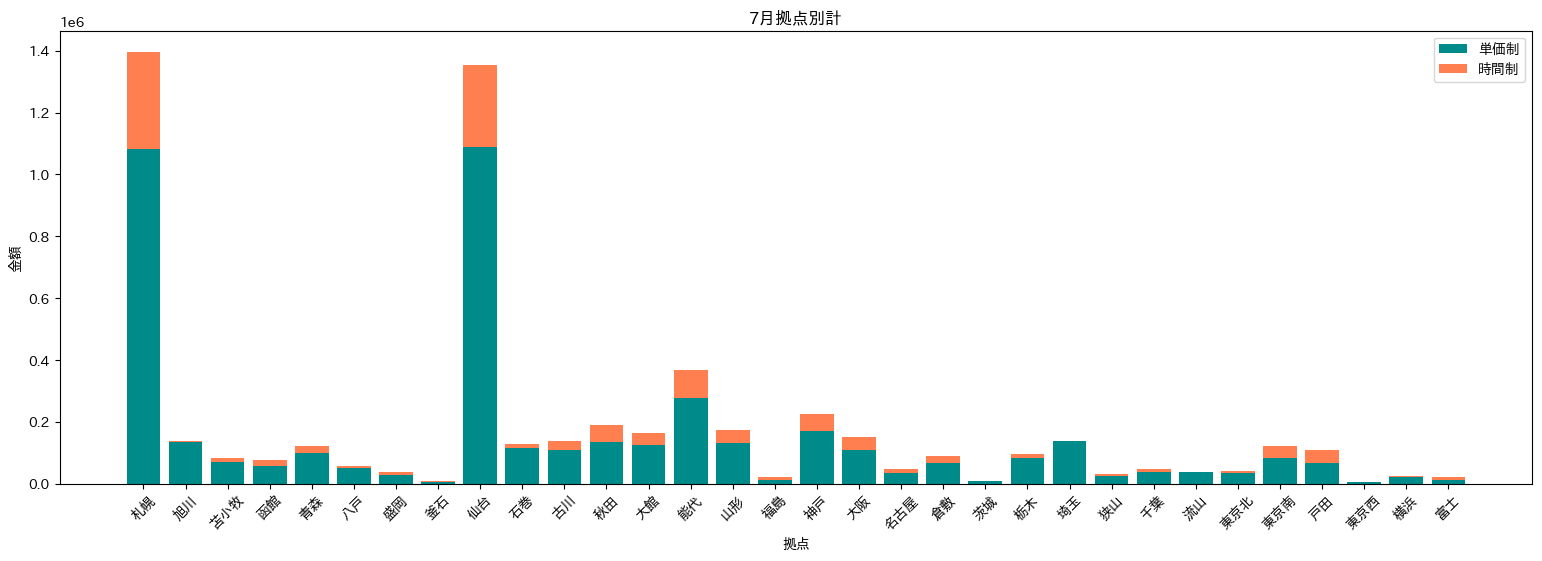

In [72]:
plt.figure(figsize=(19,6), dpi=100)
plt.bar(labels07, volume07, width=0.8, color='darkcyan', label='単価制')
plt.bar(labels07, volume07_2, width=0.8, color='coral', label='時間制', bottom=volume07)
plt.legend()
plt.title('7月拠点別計')
plt.xlabel('拠点')
plt.ylabel('金額')
plt.xticks(rotation=45)
plt.show()

In [73]:
#8月

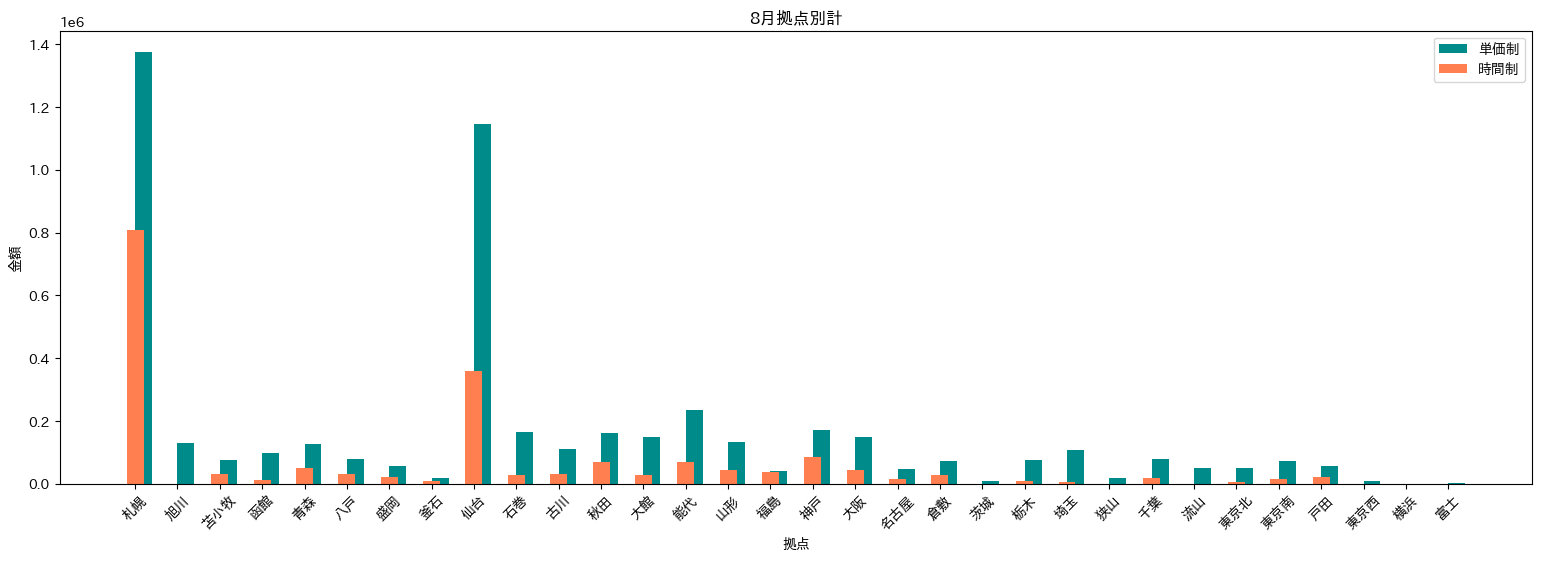

In [74]:
plt.figure(figsize=(19,6), dpi=100)
plt.bar(labels08, volume08, width=0.4, align='edge', color='darkcyan', label='単価制')
plt.bar(labels08, volume08_2, width=0.4, align='center', color='coral', label='時間制')
plt.legend()
plt.title('8月拠点別計')
plt.xlabel('拠点')
plt.ylabel('金額')
plt.xticks(rotation=45)
plt.show()

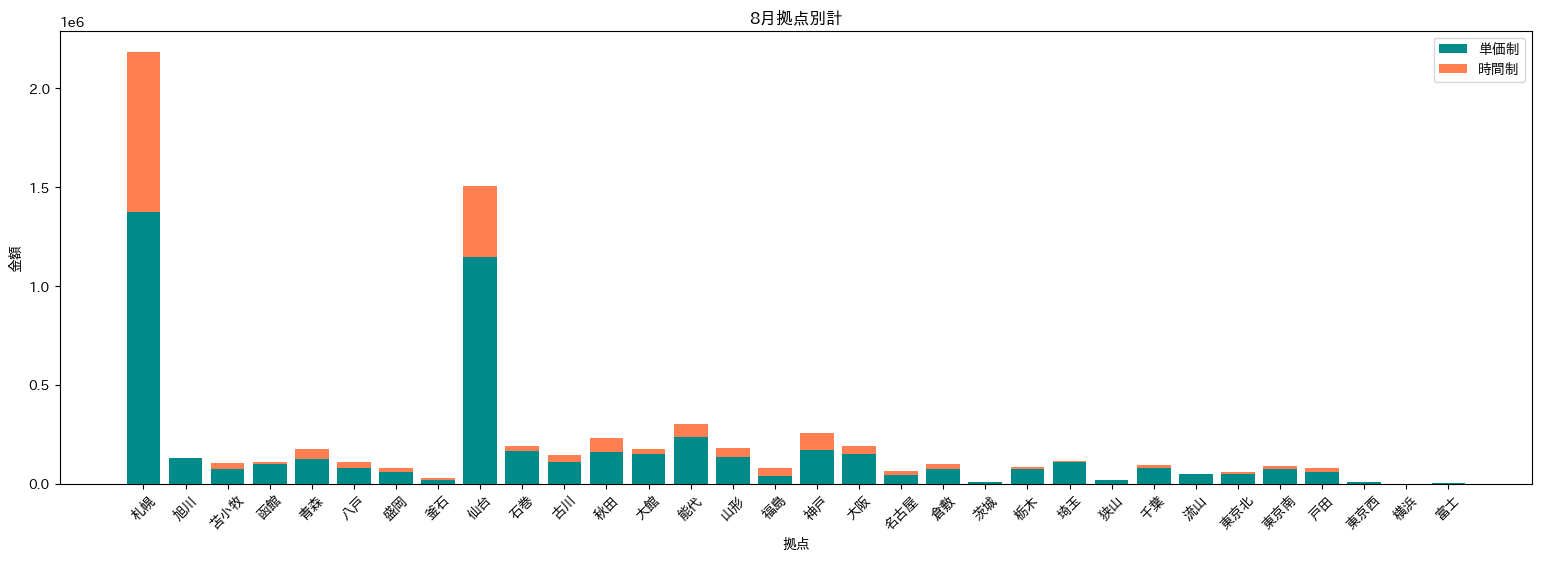

In [75]:
plt.figure(figsize=(19,6), dpi=100)
plt.bar(labels08, volume08, width=0.8, color='darkcyan', label='単価制')
plt.bar(labels08, volume08_2, width=0.8, color='coral', label='時間制', bottom=volume08)
plt.legend()
plt.title('8月拠点別計')
plt.xlabel('拠点')
plt.ylabel('金額')
plt.xticks(rotation=45)
plt.show()

In [76]:
#9月

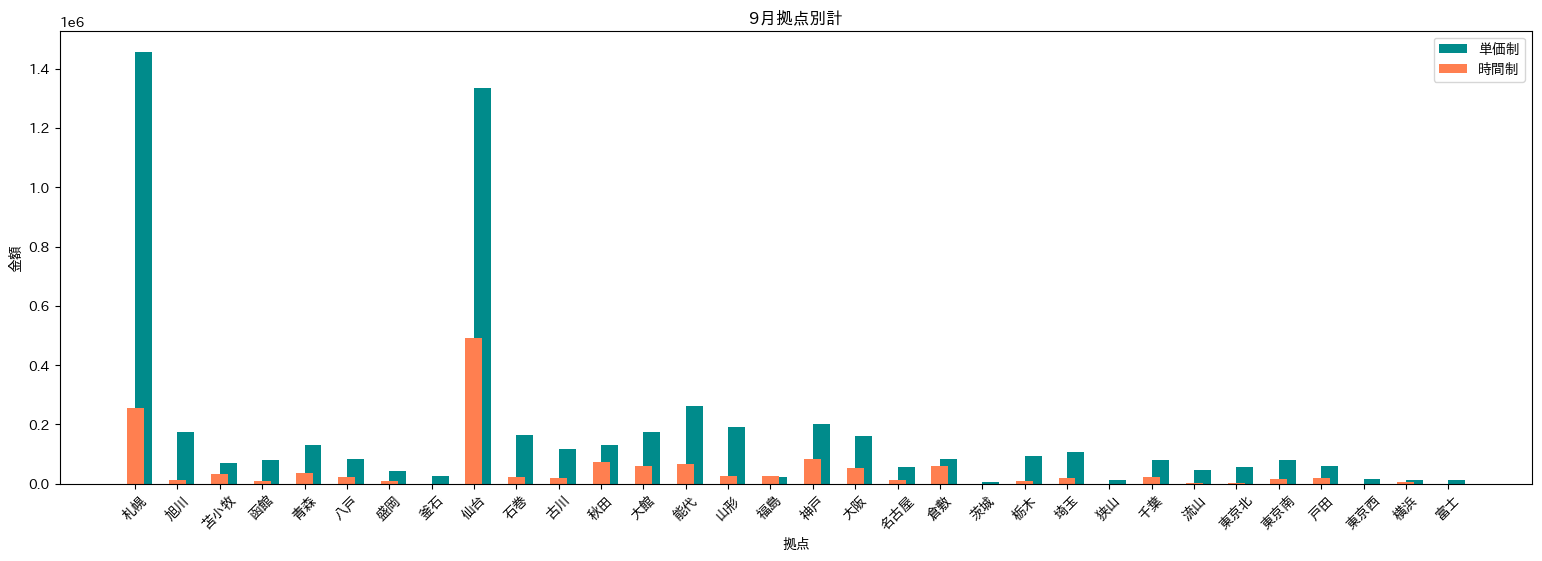

In [77]:
plt.figure(figsize=(19,6), dpi=100)
plt.bar(labels09, volume09, width=0.4, align='edge', color='darkcyan', label='単価制')
plt.bar(labels09, volume09_2, width=0.4, align='center', color='coral', label='時間制')
plt.legend()
plt.title('9月拠点別計')
plt.xlabel('拠点')
plt.ylabel('金額')
plt.xticks(rotation=45)
plt.show()

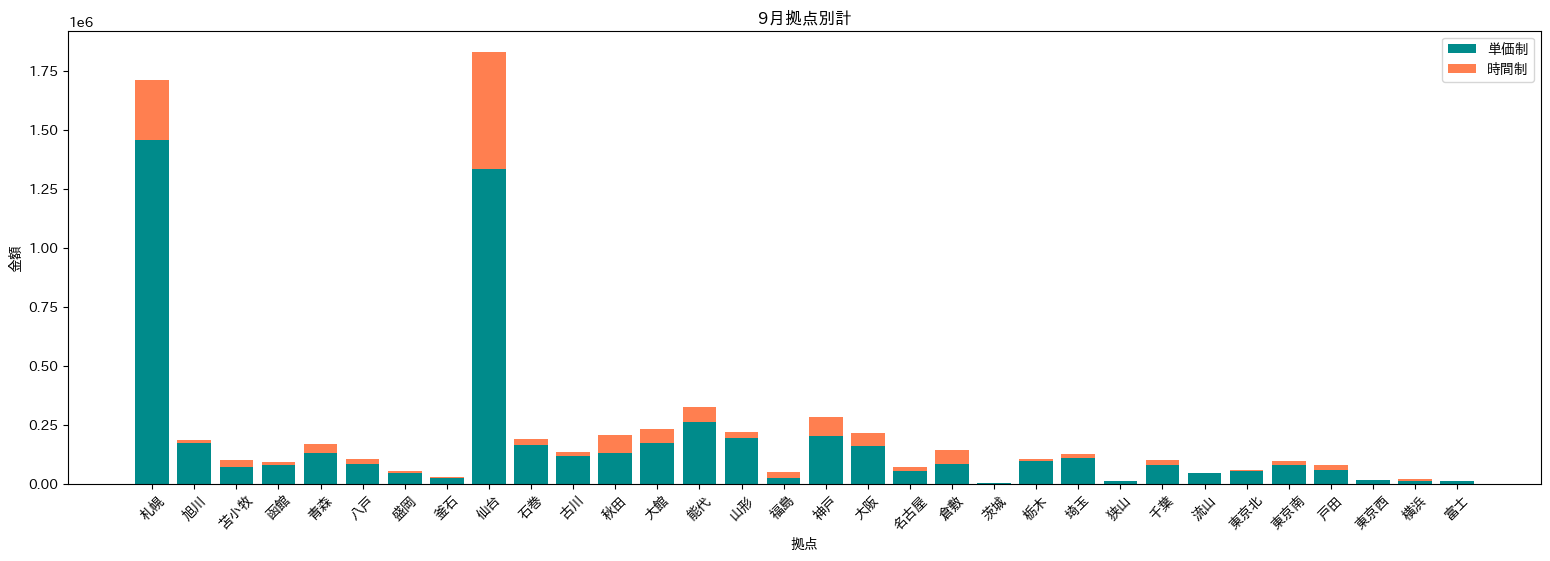

In [78]:
plt.figure(figsize=(19,6), dpi=100)
plt.bar(labels09, volume09, width=0.8, color='darkcyan', label='単価制')
plt.bar(labels09, volume09_2, width=0.8, color='coral', label='時間制', bottom=volume09)
plt.legend()
plt.title('9月拠点別計')
plt.xlabel('拠点')
plt.ylabel('金額')
plt.xticks(rotation=45)
plt.show()

In [79]:
#10月

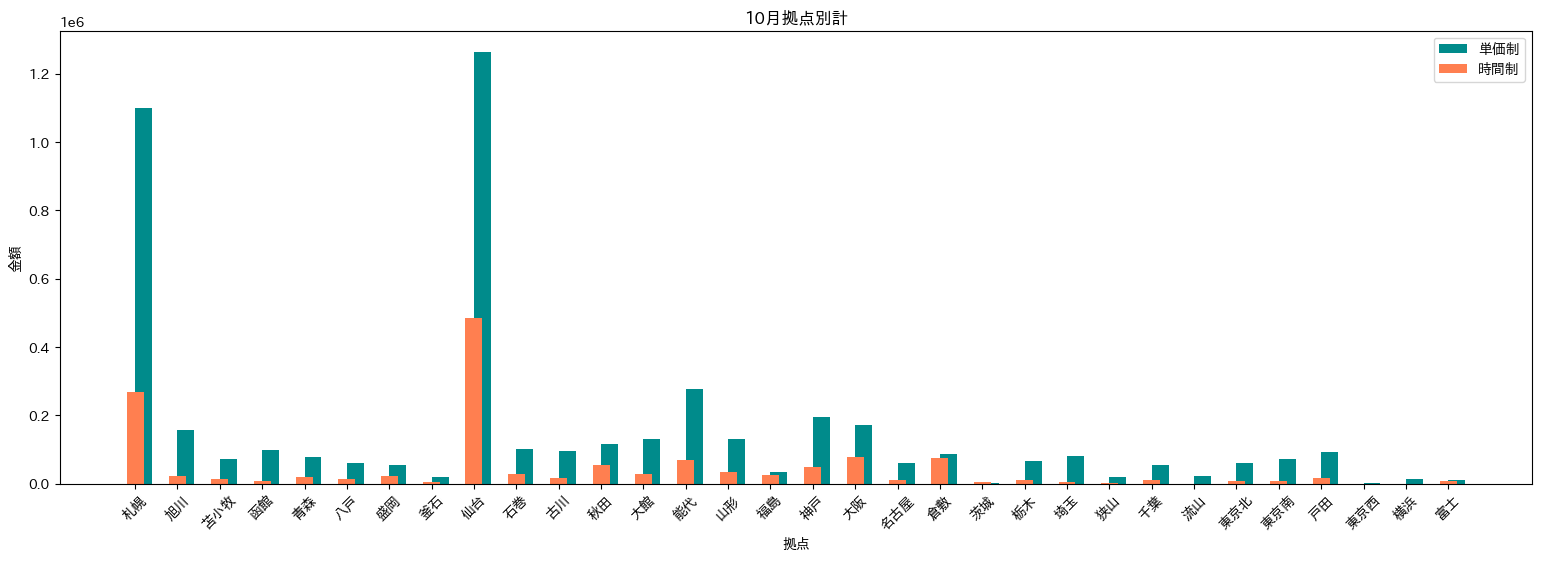

In [80]:
plt.figure(figsize=(19,6), dpi=100)
plt.bar(labels10, volume10, width=0.4, align='edge', color='darkcyan', label='単価制')
plt.bar(labels10, volume10_2, width=0.4, align='center', color='coral', label='時間制')
plt.legend()
plt.title('10月拠点別計')
plt.xlabel('拠点')
plt.ylabel('金額')
plt.xticks(rotation=45)
plt.show()

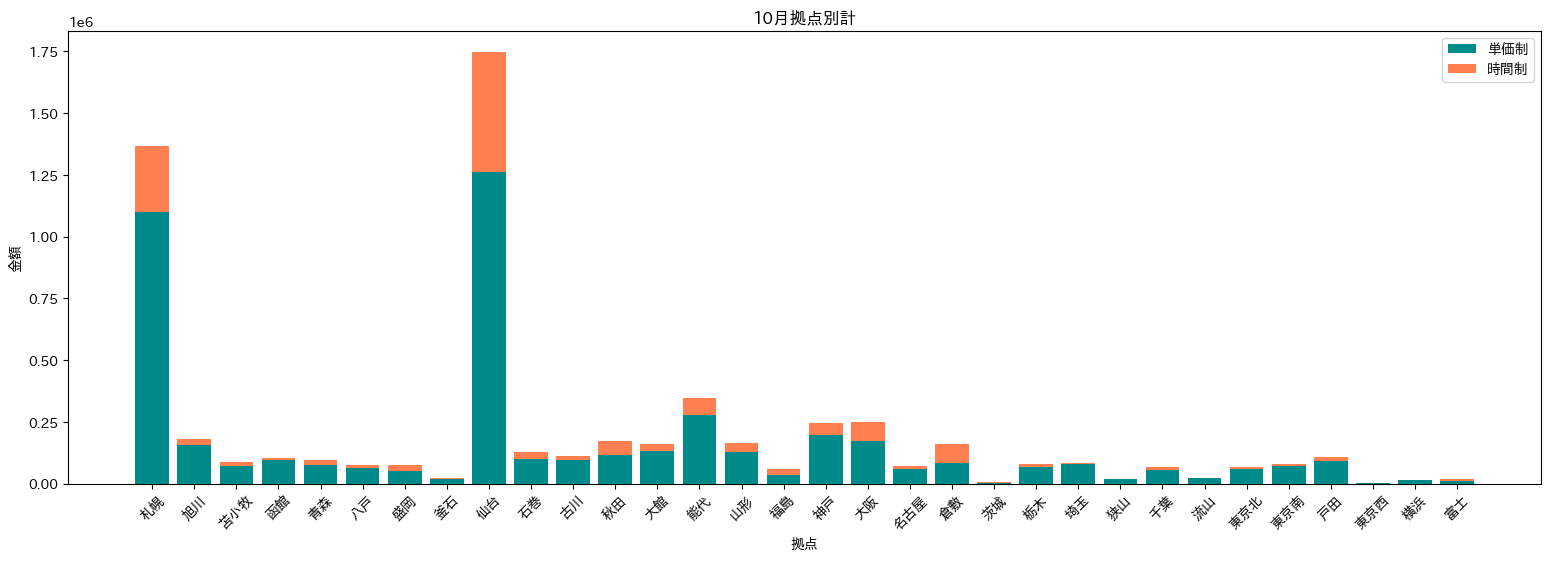

In [81]:
plt.figure(figsize=(19,6), dpi=100)
plt.bar(labels10, volume10, width=0.8, color='darkcyan', label='単価制')
plt.bar(labels10, volume10_2, width=0.8, color='coral', label='時間制', bottom=volume10)
plt.legend()
plt.title('10月拠点別計')
plt.xlabel('拠点')
plt.ylabel('金額')
plt.xticks(rotation=45)
plt.show()

In [82]:
#11月

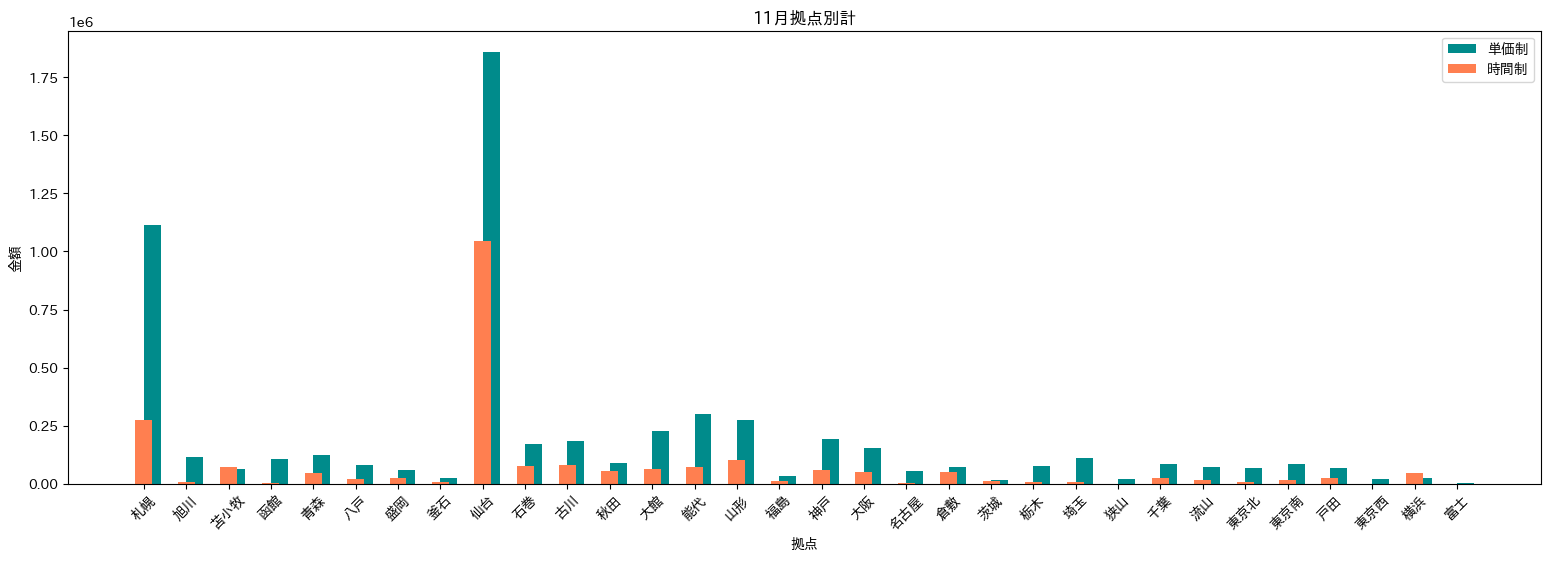

In [83]:
plt.figure(figsize=(19,6), dpi=100)
plt.bar(labels11, volume11, width=0.4, align='edge', color='darkcyan', label='単価制')
plt.bar(labels11, volume11_2, width=0.4, align='center', color='coral', label='時間制')
plt.legend()
plt.title('11月拠点別計')
plt.xlabel('拠点')
plt.ylabel('金額')
plt.xticks(rotation=45)
plt.show()

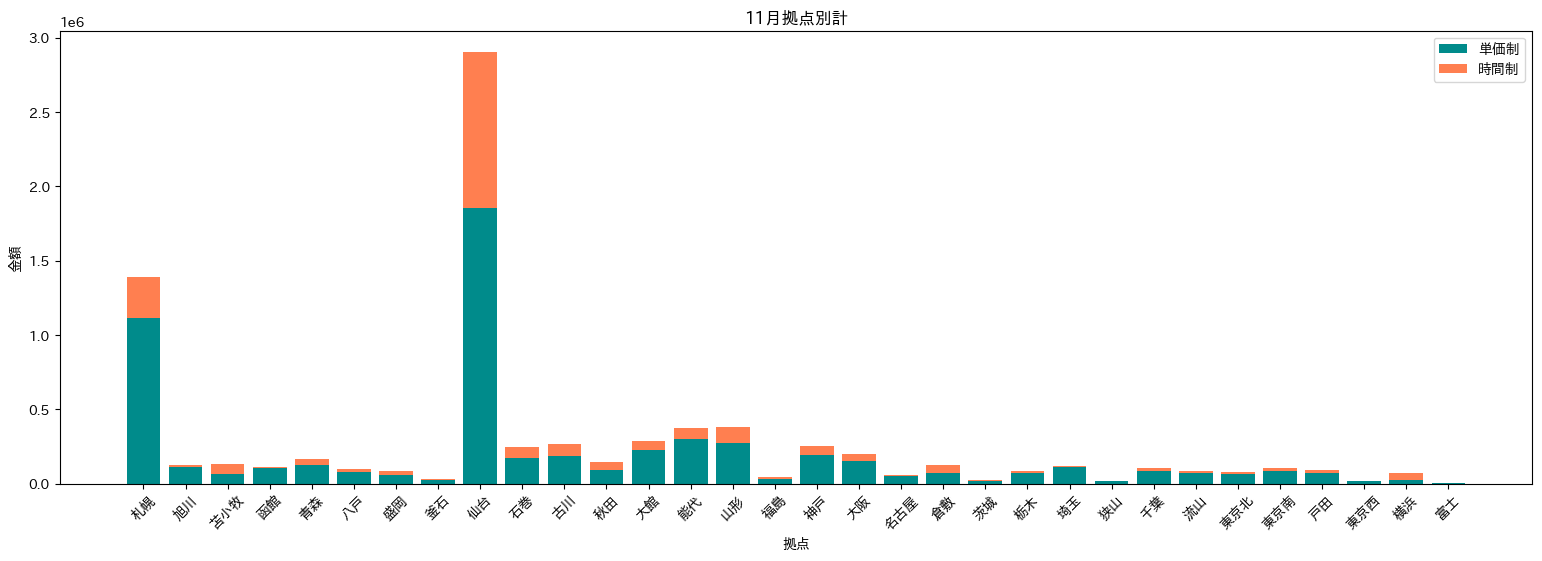

In [84]:
plt.figure(figsize=(19,6), dpi=100)
plt.bar(labels11, volume11, width=0.8, color='darkcyan', label='単価制')
plt.bar(labels11, volume11_2, width=0.8, color='coral', label='時間制', bottom=volume11)
plt.legend()
plt.title('11月拠点別計')
plt.xlabel('拠点')
plt.ylabel('金額')
plt.xticks(rotation=45)
plt.show()

In [85]:
#時間外を合算した場合の数値目視

In [86]:
#時間外を合算した場合の数値目視
df06_mix = df06_OK.drop(['6月差額'], axis=1)
df06_mix.loc['columns_total'] = df06_mix.sum(numeric_only=True, axis=0)

df07_mix = df07_OK.drop(['7月差額'], axis=1)
df07_mix.loc['columns_total'] = df07_mix.sum(numeric_only=True, axis=0)

df08_mix = df08_OK.drop(['8月差額'], axis=1)
df08_mix.loc['columns_total'] = df08_mix.sum(numeric_only=True, axis=0)

df09_mix = df09_OK.drop(['9月差額'], axis=1)
df09_mix.loc['columns_total'] = df09_mix.sum(numeric_only=True, axis=0)

df10_mix = df10_OK.drop(['10月差額'], axis=1)
df10_mix.loc['columns_total'] = df10_mix.sum(numeric_only=True, axis=0)

df11_mix = df11_OK.drop(['11月差額'], axis=1)
df11_mix.loc['columns_total'] = df11_mix.sum(numeric_only=True, axis=0)

In [87]:
#エクセル変換
#export_file_path = 'C:\\Users\\yhres\\desktop'
#df_m5.to_excel(export_file_path+'/'+'check.xlsx')